In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


In [30]:
df = pd.read_csv("petfinder-pawpularity-score/train.csv")
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


观察不同变量下Pawpularity的分布情况

<AxesSubplot:xlabel='type', ylabel='Pawpularity'>

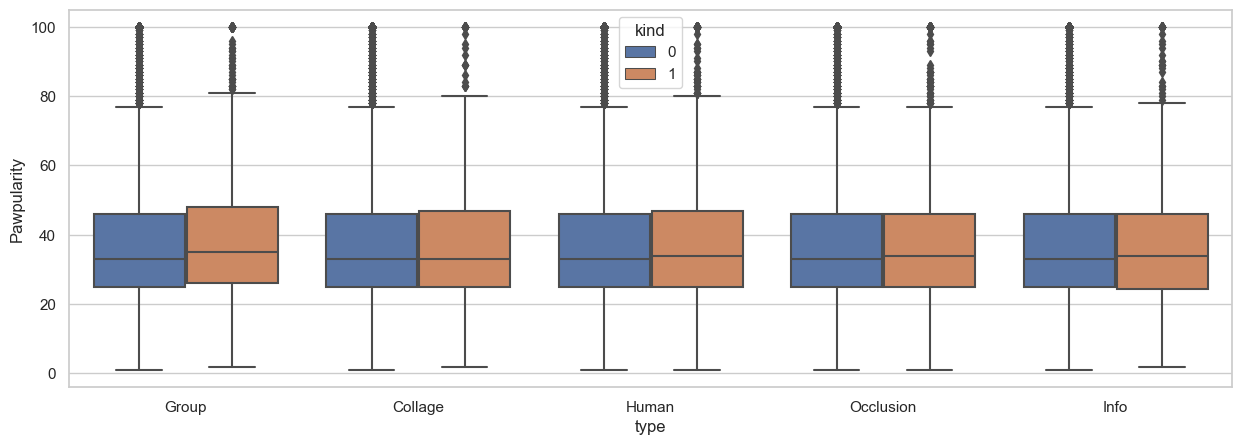

In [31]:
varbs = df.columns.values[1:-1]
bind_df = pd.DataFrame()
for var in varbs[6:11]:
    temp = df[[var,"Pawpularity"]]
    temp.loc[:, "type"] = var
    temp.columns=['kind','Pawpularity','type']
    bind_df=bind_df.append(temp)
plt.figure(figsize=(15,5),dpi=100)
sns.set(style="whitegrid")
sns.boxplot(x="type",y="Pawpularity",data=bind_df,hue="kind")

效果不明显，考虑相关系数最大的几个参数

<AxesSubplot:xlabel='type', ylabel='Pawpularity'>

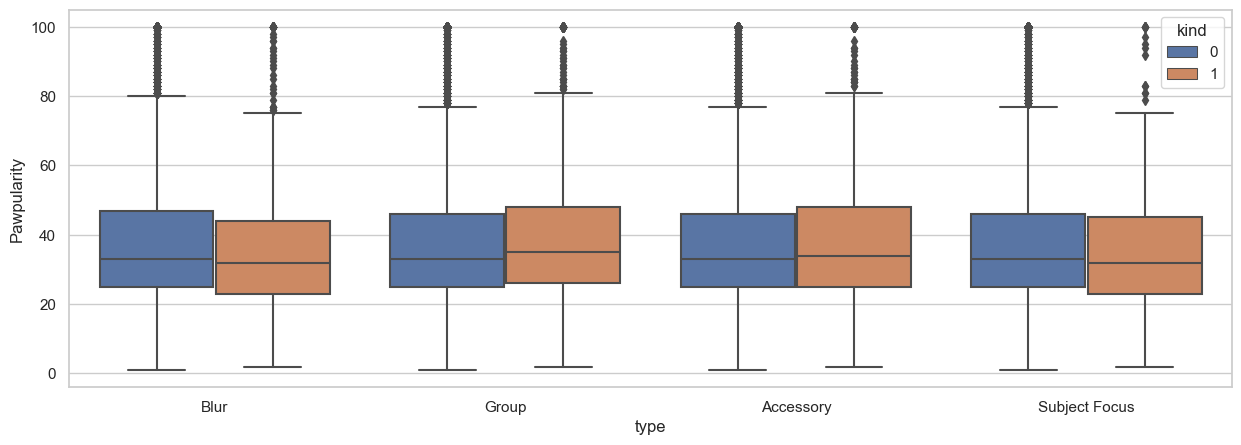

In [32]:
top_rel = pd.DataFrame(abs(df.corr()["Pawpularity"])).sort_values(by="Pawpularity", ascending=False).index[1:5]
varbs = df.columns.values[1:-1]
bind_df = pd.DataFrame()
for var in top_rel:
    temp = df[[var,"Pawpularity"]]
    temp.loc[:,("type")] = var
    temp.columns=['kind','Pawpularity','type']
    bind_df=bind_df.append(temp)
plt.figure(figsize=(15,5),dpi=100)
sns.set(style="whitegrid")
sns.boxplot(x="type", y="Pawpularity",data=bind_df,hue="kind")

,Pawpularity
Pawpularity,
1,4
2,77
3,90
4,36
5,34
...,...
96,12
97,8
98,10


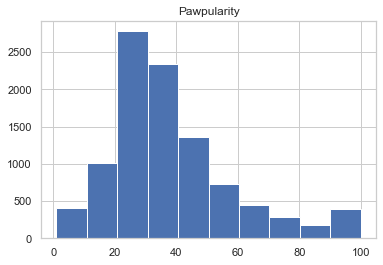

In [33]:
count_df = pd.DataFrame(df.groupby("Pawpularity")["Pawpularity"].agg("count"))
df.hist(column="Pawpularity")
count_df

In [34]:
max_cnt = count_df["Pawpularity"].max()
for i in range(0,100):
    cnt = count_df.iloc[i,0]
    dif_cnt = max_cnt - cnt
    df = df.append(df[df["Pawpularity"] == (i+1)].sample(dif_cnt,replace=True,axis=0))

array([[<AxesSubplot:title={'center':'Pawpularity'}>]], dtype=object)

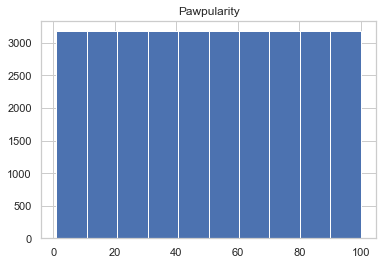

In [35]:
df.hist(column="Pawpularity")